In [2]:
#Answer 5

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

loan_data=pd.read_csv('J:\MTech Notes\FOML\Assignments\Assignment 3\loan_train.csv')
data=loan_data.copy()


unwanted_cols=["id","member_id", "funded_amnt", "emp_title", "pymnt_plan", "recoveries", "collection_recovery_fee", 
               "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
               "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths",
               "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies",
               "url", "desc", "title", "zip_code","addr_state", "delinq_2yrs", "mths_since_last_delinq",
               "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp",
               "out_prncp_inv"]

data.drop(unwanted_cols, axis=1, inplace=True)

print("Final features to be considered are", data.columns)


#print(data.info())
print('Data columns and total null values are :\n', data.isnull().sum())


Final features to be considered are Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_o

In [3]:
null_data=data.isnull().sum()
data.describe()
unwanted_col_count=0
for i in range(len(null_data)):
      if null_data[i] == 24999:
            unwanted_col_count = unwanted_col_count+ 1
print('Total number of unwanted columns having NA values are : ', unwanted_col_count) 

#unwanted and having all NA values columns dropped
 
data.dropna(how='all', axis=1, inplace=True)

Total number of unwanted columns having NA values are :  54


In [4]:
#Displaying Columns having nan values in between and replacing accordingly
nan_values = data.isna()
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan)

data=data.apply(lambda x:x.fillna(x.mean()) if x.dtype=='float' else 
                x.fillna(x.value_counts().index[0]))

print(data.isnull().sum())

['emp_length', 'revol_util']
loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
dtype: int64


In [5]:
data.head(5)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,10000,9950.00000,36 months,7.51%,311.11,A,A4,10+ years,RENT,30000.0,...,10-Sep,Charged Off,home_improvement,5.00,1-Feb,3,19,0,1.20%,48
1,15000,14800.00000,36 months,8.94%,476.58,A,A5,1 year,RENT,147000.0,...,10-Jan,Fully Paid,other,3.47,Feb-97,0,6,0,14%,17
2,2000,2000.00000,36 months,13.57%,67.94,C,C3,4 years,OWN,36000.0,...,9-Oct,Fully Paid,major_purchase,7.83,Mar-00,0,8,0,34.40%,10
3,35000,33951.84413,60 months,20.89%,944.71,F,F1,10+ years,MORTGAGE,160000.0,...,11-Nov,Current,debt_consolidation,12.11,Jun-99,1,13,2,91.40%,21
4,14000,14000.00000,60 months,17.49%,351.64,D,D5,5 years,MORTGAGE,50000.0,...,11-Jul,Fully Paid,debt_consolidation,21.24,4-Jun,1,9,1,9.40%,27


In [5]:
# removing the '%' from int_rate and revol_util and converting to numeric

data["int_rate"] = pd.to_numeric(data["int_rate"].apply(lambda x:x.split('%')[0]))
data["revol_util"] = pd.to_numeric(data["revol_util"].apply(lambda x:x.split('%')[0]))

# remove word 'months' from term feature and converting to numeric
data["term"] = pd.to_numeric(data["term"].apply(lambda x:x.split()[0]))

#removing the records where Loan_status=Current as it is irrelevant

data = data[data["loan_status"].apply(lambda x:False if x == "Current" else True)]

#assigning loan_status as Fully Paid to 0 and Charged Off to 1
data["loan_status"] = data["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else -1)

# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
data["emp_length"] = pd.to_numeric(data["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# look through the purpose value counts
loan_purpose_values = data["purpose"].value_counts()*100/data.shape[0]

# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
data = data[[False if p in loan_purpose_delete else True for p in data["purpose"]]]

#Outlier treatment

annual_inc_q = data["annual_inc"].quantile(0.99)
data = data[data["annual_inc"] < annual_inc_q]

open_acc_q = data["open_acc"].quantile(0.999)
data = data[data["open_acc"] < open_acc_q]

total_acc_q = data["total_acc"].quantile(0.98)
data = data[data["total_acc"] < total_acc_q]

pub_rec_q = data["pub_rec"].quantile(0.995)
data = data[data["pub_rec"] <= pub_rec_q]


In [6]:
#Category to Binary conversion
labels = data['grade'].astype('category').cat.categories.tolist()
replace_map_comp = {'grade' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data.replace(replace_map_comp, inplace=True)
print(replace_map_comp)

data['purpose'].unique()
labels = data['purpose'].astype('category').cat.categories.tolist()
replace_purpose = {'purpose' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data.replace(replace_purpose, inplace=True)
print(replace_purpose)

labels = data['home_ownership'].astype('category').cat.categories.tolist()
replace_ownership = {'home_ownership' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data.replace(replace_ownership, inplace=True)
print(replace_ownership)

labels = data['sub_grade'].astype('category').cat.categories.tolist()
replace_sub_grade = {'sub_grade' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data.replace(replace_sub_grade, inplace=True)
print(replace_sub_grade)

labels = data['verification_status'].astype('category').cat.categories.tolist()
replace_verify = {'verification_status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data.replace(replace_verify, inplace=True)
print(replace_verify)

col_drop=['issue_d','earliest_cr_line']
data.drop(col_drop, axis=1, inplace=True)

{'grade': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}}
{'purpose': {'car': 1, 'credit_card': 2, 'debt_consolidation': 3, 'home_improvement': 4, 'major_purchase': 5, 'medical': 6, 'moving': 7, 'other': 8, 'small_business': 9, 'wedding': 10}}
{'home_ownership': {'MORTGAGE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}}
{'sub_grade': {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20, 'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25, 'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30, 'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35}}
{'verification_status': {'Not Verified': 1, 'Source Verified': 2, 'Verified': 3}}


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,10000,9950.000000,36,7.51,311.11,1,4,10,4,30000.0,...,3,19,0,1.2,48,2247.210000,2235.98,1509.91,350.87,0.0
1,15000,14800.000000,36,8.94,476.58,1,5,1,4,147000.0,...,0,6,0,14.0,17,15112.760000,14911.26,15000.00,112.76,0.0
2,2000,2000.000000,36,13.57,67.94,3,13,4,3,36000.0,...,0,8,0,34.4,10,2354.966827,2354.97,2000.00,354.97,0.0
4,14000,14000.000000,60,17.49,351.64,4,20,5,1,50000.0,...,1,9,1,9.4,27,20804.230020,20804.23,14000.00,6804.23,0.0
6,10000,6480.473624,60,7.88,131.93,1,5,4,1,65000.0,...,1,13,0,19.1,23,7908.889997,7846.07,6525.00,1383.89,0.0


In [7]:
#applying all the steps to test data

loan_data_test=pd.read_csv('J:\MTech Notes\FOML\Assignments\Assignment 3\loan_test.csv')
test_data=loan_data_test.copy()

unwanted_cols=["id","member_id", "funded_amnt", "emp_title", "pymnt_plan", "recoveries", "collection_recovery_fee", 
               "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
               "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths",
               "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies",
               "url", "desc", "title", "zip_code","addr_state", "delinq_2yrs", "mths_since_last_delinq",
               "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp",
               "out_prncp_inv"]

test_data.drop(unwanted_cols, axis=1, inplace=True)
test_data.dropna(how='all', axis=1, inplace=True)
test_data=test_data.apply(lambda x:x.fillna(x.mean()) if x.dtype=='float' else 
                x.fillna(x.value_counts().index[0]))

# removing the '%' from int_rate and revol_util and converting to numeric

test_data["int_rate"] = pd.to_numeric(test_data["int_rate"].apply(lambda x:x.split('%')[0]))
test_data["revol_util"] = pd.to_numeric(test_data["revol_util"].apply(lambda x:x.split('%')[0]))

# remove word 'months' from term feature and converting to numeric
test_data["term"] = pd.to_numeric(test_data["term"].apply(lambda x:x.split()[0]))

#removing the records where Loan_status=Current as it is irrelevant

test_data = test_data[test_data["loan_status"].apply(lambda x:False if x == "Current" else True)]

#assigning loan_status as Fully Paid to 0 and Charged Off to 1
test_data["loan_status"] = test_data["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else -1)

# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
test_data["emp_length"] = pd.to_numeric(test_data["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# look through the purpose value counts
loan_purpose_values = test_data["purpose"].value_counts()*100/test_data.shape[0]
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
test_data = test_data[[False if p in loan_purpose_delete else True for p in test_data["purpose"]]]

#Outlier treatment on test data

annual_inc_q = test_data["annual_inc"].quantile(0.99)
test_data = test_data[test_data["annual_inc"] < annual_inc_q]

open_acc_q = test_data["open_acc"].quantile(0.999)
test_data = test_data[test_data["open_acc"] < open_acc_q]

total_acc_q = test_data["total_acc"].quantile(0.98)
test_data = test_data[test_data["total_acc"] < total_acc_q]

pub_rec_q = test_data["pub_rec"].quantile(0.995)
test_data = test_data[test_data["pub_rec"] <= pub_rec_q]

#converting categorical data into binary features, 
labels = test_data['grade'].astype('category').cat.categories.tolist()
replace_map_comp = {'grade' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_data.replace(replace_map_comp, inplace=True)
print(replace_map_comp)
test_data['purpose'].unique()
labels = test_data['purpose'].astype('category').cat.categories.tolist()
replace_purpose = {'purpose' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_data.replace(replace_purpose, inplace=True)
print(replace_purpose)
labels = test_data['home_ownership'].astype('category').cat.categories.tolist()
replace_ownership = {'home_ownership' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_data.replace(replace_ownership, inplace=True)
print(replace_ownership)

labels = test_data['sub_grade'].astype('category').cat.categories.tolist()
replace_sub_grade = {'sub_grade' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_data.replace(replace_sub_grade, inplace=True)
print(replace_sub_grade)
labels = test_data['verification_status'].astype('category').cat.categories.tolist()
replace_verify = {'verification_status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_data.replace(replace_verify, inplace=True)
print(replace_verify)

col_drop=['issue_d','earliest_cr_line']
test_data.drop(col_drop, axis=1, inplace=True)
test_data.head(5)

{'grade': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}}
{'purpose': {'car': 1, 'credit_card': 2, 'debt_consolidation': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'small_business': 10, 'wedding': 11}}
{'home_ownership': {'MORTGAGE': 1, 'NONE': 2, 'OTHER': 3, 'OWN': 4, 'RENT': 5}}
{'sub_grade': {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20, 'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25, 'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30, 'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35}}
{'verification_status': {'Not Verified': 1, 'Source Verified': 2, 'Verified': 3}}


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,4200,4200.0,36,6.62,128.96,1,2,6,5,69000.0,...,0,10,0,11.6,15,4642.374867,4642.37,4200.00,442.37,0.00000
1,1325,1325.0,36,13.49,44.96,3,12,0,5,24000.0,...,0,3,0,11.9,3,1476.640000,1476.64,1145.61,287.60,14.93661
2,10000,9975.0,36,8.94,317.72,1,5,4,1,75000.0,...,1,10,0,46.4,45,10287.347790,10261.63,10000.00,287.35,0.00000
3,6000,6000.0,60,16.49,147.48,4,18,10,5,60000.0,...,0,20,0,60.2,24,8848.343924,8848.34,6000.00,2848.34,0.00000
4,25000,25000.0,36,15.21,869.21,4,17,4,5,135000.0,...,2,20,0,55.7,44,31293.587380,31293.59,25000.00,6293.59,0.00000


In [8]:
X_train=data.drop('loan_status',axis=1)
y_train=data['loan_status']

X_test=test_data.drop('loan_status',axis=1)
y_test=test_data['loan_status']

gradient_booster = GradientBoostingClassifier(learning_rate=5)
gradient_booster.fit(X_train,y_train)

from sklearn.metrics import classification_report
YPred=gradient_booster.predict(X_test)
accuracy=accuracy_score(y_test,YPred)
report = classification_report(YPred,y_test)
print(report)
print(accuracy)


GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=5,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
#tuning hyperparameters

# tuning n_estimators and learning_rate
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,51,10), 'learning_rate':[0.01,0.1,1,10]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
print(gsearch1.best_params_)


{'learning_rate': 0.1, 'n_estimators': 50}
              precision    recall  f1-score   support

          -1       0.02      0.62      0.04        64
           1       1.00      0.85      0.92     13436

    accuracy                           0.85     13500
   macro avg       0.51      0.74      0.48     13500
weighted avg       0.99      0.85      0.91     13500

0.8488148148148148


In [13]:
#tuning tree specific parameters: max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV
param_test2 = {'max_depth':range(5,16,5), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features=6, subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_
print(gsearch2.best_params_)


{'max_depth': 15, 'min_samples_split': 200}


In [14]:
#tuning min_samples_split and min_samples_leaf

param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=15,max_features=6,min_samples_split=200,subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 60, 'min_samples_split': 1000}, 0.9968086082274675)

In [16]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1,n_estimators= 50,max_depth=15,min_samples_split=60,min_samples_leaf=100,subsample=0.8, random_state=10)
gradient_booster.fit(X_train,y_train)
YPred=gradient_booster.predict(X_test)
accuracy=accuracy_score(y_test,YPred)
report = classification_report(YPred,y_test)
print(report)
print(accuracy)

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      1980
           1       1.00      0.99      1.00     11520

    accuracy                           0.99     13500
   macro avg       0.98      0.99      0.99     13500
weighted avg       0.99      0.99      0.99     13500

0.9929629629629629


[0.15237, 0.021039999999999948, 0.011929999999999996, 0.009040000000000048, 0.007929999999999993, 0.006959999999999966, 0.006440000000000001, 0.006299999999999972]
[1, 11, 21, 31, 41, 51, 61, 71]


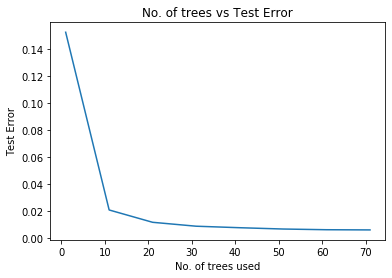

In [20]:
trees=[]
err=[]
for i in range(1,75,10):
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1,n_estimators= i,max_depth=15,min_samples_split=60,min_samples_leaf=100,subsample=0.8, random_state=10)
    gradient_booster.fit(X_train,y_train)
    YPred=gradient_booster.predict(X_test)
    accuracy=accuracy_score(y_test,YPred)
    accuracy=round(accuracy,5)
    err.append(1-accuracy)
    trees.append(i)

print(err)
print(trees)
#graph plot between m and test error
import matplotlib.pyplot as plt
 

x = trees
y = err
plt.plot(x, y)
 

plt.xlabel('No. of trees used')

plt.ylabel('Test Error')
 

plt.title('No. of trees vs Test Error')
plt.show()



In [27]:
#implementing using basic decision tree

from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
test_pred_decision_tree = clf.predict(X_test)
accuracy=accuracy_score(test_pred_decision_tree,YPred)
report = classification_report(YPred,y_test)
print(report)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.9932592592592593
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      1986
           1       1.00      0.99      1.00     11514

    accuracy                           0.99     13500
   macro avg       0.98      0.99      0.99     13500
weighted avg       0.99      0.99      0.99     13500

